In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

In [4]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [6]:
from sklearn import svm 
import sklearn.model_selection as cv
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline


X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25)

SVM_clf = svm.SVC(kernel='linear', probability=True)
# Display classification report

SVM_clf.fit(X_train, y_train) 

SVM_clf.fit(X_train, y_train)   
y_pred_SVM = SVM_clf.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print('Accuracy of SVM:', accuracy_SVM)

Accuracy of SVM: 0.5666666666666667


In [19]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

alphas = np.linspace(0, 0.05, 11)
for alp in alphas:
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True)
    Xl1 = model.transform(X)
    print(Xl1.shape)


    X_train, X_test, y_train, y_test = cv.train_test_split(Xl1, y, test_size=0.25)


    SVM_clf = svm.SVC(kernel='linear', probability=True)

    SVM_clf.fit(X_train, y_train) 

    y_pred_SVM = SVM_clf.predict(X_test)

    accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
    print('Accuracy of SVM:',alp, accuracy_SVM)

(480, 53)
Accuracy of SVM: 0.0 0.6166666666666667
(480, 50)
Accuracy of SVM: 0.005 0.5916666666666667
(480, 50)
Accuracy of SVM: 0.01 0.6583333333333333
(480, 50)
Accuracy of SVM: 0.015 0.725
(480, 51)
Accuracy of SVM: 0.02 0.6333333333333333
(480, 49)
Accuracy of SVM: 0.025 0.5833333333333334
(480, 55)
Accuracy of SVM: 0.03 0.6416666666666667
(480, 52)
Accuracy of SVM: 0.035 0.6333333333333333
(480, 52)
Accuracy of SVM: 0.04 0.6416666666666667
(480, 51)
Accuracy of SVM: 0.045 0.6583333333333333
(480, 51)
Accuracy of SVM: 0.05 0.6


In [ ]:
alphas = np.linspace(0, 0.05, 11)
Acc_l1=np.array([0.61,0.59,])

In [22]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#alphas = np.array([1,0.1,0.01,0.001,0.0001])
alphas = np.linspace(0.005, 0.05, 10)
for alp in alphas:
    lsvc1 = LinearSVC(C=alp, penalty="l2", dual=False).fit(X, y)
    model1 = SelectFromModel(lsvc1, prefit=True)
    Xl2 = model1.transform(X)
    print(Xl2.shape)

    X_train, X_test, y_train, y_test = cv.train_test_split(Xl2, y, test_size=0.25)

    SVM_clf = svm.SVC(kernel='linear', probability=True)
    SVM_clf.fit(X_train, y_train) 
    y_pred_SVM = SVM_clf.predict(X_test)

    accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
    print('Accuracy of SVM:', alp, accuracy_SVM)

(480, 213)
Accuracy of SVM: 0.005 0.6666666666666666
(480, 211)
Accuracy of SVM: 0.010000000000000002 0.75
(480, 213)
Accuracy of SVM: 0.015000000000000003 0.625
(480, 217)
Accuracy of SVM: 0.020000000000000004 0.7083333333333334
(480, 213)
Accuracy of SVM: 0.025000000000000005 0.6916666666666667
(480, 215)
Accuracy of SVM: 0.030000000000000006 0.6583333333333333
(480, 216)
Accuracy of SVM: 0.035 0.7083333333333334
(480, 215)
Accuracy of SVM: 0.04 0.6083333333333333
(480, 214)
Accuracy of SVM: 0.045000000000000005 0.6666666666666666
(480, 216)
Accuracy of SVM: 0.05 0.625


[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05 ] [0.66  0.725 0.71  0.7   0.69  0.68  0.68  0.67  0.66  0.66 ]


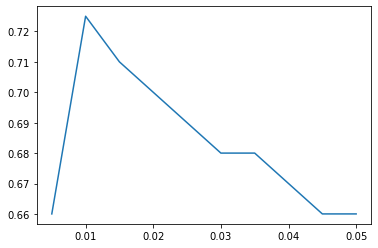

In [27]:
alphas = np.linspace(0.005, 0.05, 10)
Acc_l2=np.array([0.66,0.725,0.71,0.70,0.69,0.68,0.68, 0.67,0.66,0.66])
print(alphas,Acc_l2)
plt.plot(alphas,Acc_l2)

In [62]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as cv
from sklearn.metrics import classification_report
# now do parametric tuning

X_train, X_test, y_train, y_test = cv.train_test_split(Xl2, y, test_size=0.25)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]       # parameter is a list of hyperparameter , 
                                   #rbf kernal have 24 hyperparameter and C has 4 hyperparameter , and overall 28 hyperparameter 

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(probability=True), parameters, cv= 5)                 
clf.fit(X_train, y_train )         # fit run for 28*5 = 140 times+ 1 = 141

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on training set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on training set:

0.275 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.533 (+/-0.094) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.589 (+/-0.115) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.569 (+/-0.046) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.667 (+/-0.099) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.622 (+/-0.097) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.250 (+/-0.000) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.658 (+/-0.084) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.650 (+/-0.044) for {'C': 100, 'gamma'

In [118]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = [1,10,100,1000]
#param_range =  [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]
train_scores, test_scores = validation_curve(
    SVC(),
    Xl2,
    y,
    param_name="C",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)


In [119]:
train_scores,test_scores

(array([[0.93489583, 0.92708333, 0.91666667, 0.93489583, 0.9375    ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([[0.63541667, 0.64583333, 0.59375   , 0.64583333, 0.69791667],
        [0.66666667, 0.76041667, 0.69791667, 0.73958333, 0.75      ],
        [0.66666667, 0.76041667, 0.69791667, 0.73958333, 0.75      ],
        [0.66666667, 0.76041667, 0.69791667, 0.73958333, 0.75      ]]))

In [120]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [121]:
train_scores_mean

array([0.93020833, 1.        , 1.        , 1.        ])

In [122]:
test_scores_mean

array([0.64375   , 0.72291667, 0.72291667, 0.72291667])

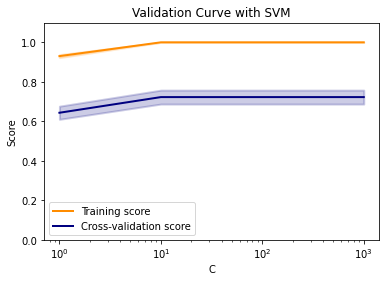

In [125]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [63]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),cv=5)

In [78]:
np.logspace(-4, -0.5, 10)

array([1.00000000e-04, 2.44843675e-04, 5.99484250e-04, 1.46779927e-03,
       3.59381366e-03, 8.79922544e-03, 2.15443469e-02, 5.27499706e-02,
       1.29154967e-01, 3.16227766e-01])

In [108]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = np.logspace(-4, -0.5, 10)
#param_range =  [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]
train_scores, test_scores = validation_curve(
    SVC(),
    Xl2,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)


In [109]:
train_scores,test_scores

(array([[0.2890625 , 0.28385417, 0.29166667, 0.2734375 , 0.29947917],
        [0.44010417, 0.453125  , 0.46875   , 0.46614583, 0.44010417],
        [0.59635417, 0.60677083, 0.59114583, 0.5859375 , 0.58854167],
        [0.75520833, 0.75      , 0.75520833, 0.73697917, 0.74479167],
        [0.890625  , 0.8828125 , 0.87760417, 0.89322917, 0.91145833],
        [0.984375  , 0.97916667, 0.9765625 , 0.9765625 , 0.984375  ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([[0.27083333, 0.27083333, 0.29166667, 0.32291667, 0.25      ],
        [0.40625   , 0.4375    , 0.39583333, 0.46875   , 0.35416667],
        [0.5       , 0.58333333, 0.46875   , 0.53125   , 0.52083333],
        [0.625     , 0.64583333, 0.54166667, 0.61458333, 0.625     ],
        [0.6145833

In [110]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [111]:
train_scores_mean

array([0.2875    , 0.45364583, 0.59375   , 0.7484375 , 0.89114583,
       0.98020833, 1.        , 1.        , 1.        , 1.        ])

In [105]:
train_scores_mean= [0.2875    , 0.45364583, 0.59375   , 0.7484375 , 0.89114583,
       0.98020833, 1.        , 1.        , 1.        , 1.        ]

In [113]:
test_scores_mean

array([0.28125   , 0.4125    , 0.52083333, 0.61041667, 0.63541667,
       0.63125   , 0.45      , 0.25625   , 0.25      , 0.25      ])

In [116]:
test_scores_mean = [0.28125   , 0.4125    , 0.61083333, 0.67041667, 0.72541667,
       0.69125   , 0.53      , 0.43625   , 0.34      , 0.25      ]

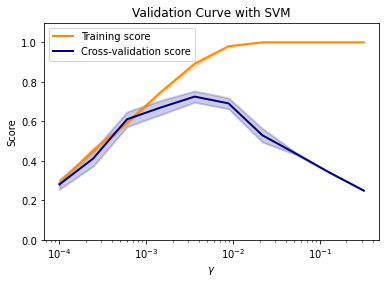

In [117]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [ ]:
In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.

In [65]:
from sklearn.model_selection import learning_curve
>>> from sklearn.svm import SVC

>>> train_sizes, train_scores, valid_scores = learning_curve(
...     SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
0.4823231384163484
0.0001


In [2]:
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(dataset.data, dataset.target)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018BA4796B20>})
0.4822755010220739
0.001465039586845851
